<a href="https://colab.research.google.com/github/edmgjr/portifolio/blob/main/Limpesa_e_preprocessamento_de_dados_googleplaystore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

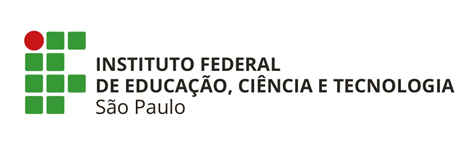

###Pacotes usados neste notebook

In [1]:
#Importanto pacotes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#1. Dataset

---


Dataset: Google Play Store Apps: https://www.kaggle.com/lava18/google-play-store-apps

Este dataset contém dados sobre aplicativos da Google Play Store.
Cada observação (registro/linha) consiste de informações de um app, tais como categoria, avaliação, tamanho, entre outros.

##1.1 Importando o Dataset

In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d lava18/google-play-store-apps

  0% 0.00/1.94M [00:00<?, ?B/s]
100% 1.94M/1.94M [00:00<00:00, 57.9MB/s]


In [4]:
!unzip google-play-store-apps.zip

Archive:  google-play-store-apps.zip
  inflating: googleplaystore.csv     
  inflating: googleplaystore_user_reviews.csv  
  inflating: license.txt             


In [5]:
data = pd.read_csv('/content/googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##1.2 Informações básicas

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


O dataset possui **10841** registros e **13** atributos. Alguns atributos possuyem atributos null que precisará ser tratado. Será necessário converter os tipos de dados de alguns atributos.

#2. Limpeza e Pré-processamento de Dados

---

In [7]:
df = data.copy()

In [8]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##2.1 Category

In [9]:
#checando de há ruídos na coluna "Category"
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [10]:
#Verificando o porque da existencia da categoria "1.9"
df.query('Category == "1.9"')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
#Removendo o registro da categoria "1.9"
df.drop(index=[10472], inplace=True)
df.shape

(10840, 13)

In [12]:
df['Category'].isnull().sum()

0

##2.2 Rating

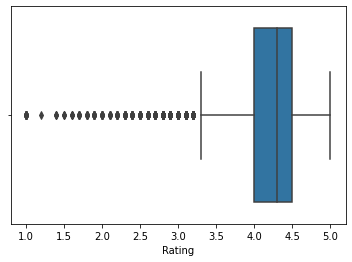

In [13]:
#Checando se possui outliers
sns.boxplot(x='Rating', data=df)

Por mais que o boxplot indique vários "outliers", considerando a distribuição, eles são valores aceitáveis e possíveis. Portanto não serão removidos

**Lidando com Nulls/NaN**

In [14]:
df.dropna(subset=['Rating'], inplace=True)

In [15]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [16]:
df['Rating'].isnull().sum()

0

##2.3 Reviews (número de avaliações)

In [17]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [19]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce') #Convertendo para formato numeric, em caso de erro substitui por NaN

In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.0+ MB


#2.4 Size

In [22]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

O atributo "Size" possui os sufixos "k" e "M" para representar escala. Há ainda alguns registros com valor "Varies with divice".

A conversão destas strings para números resulta em NaN:

In [23]:
pd.to_numeric(df['Size'], errors='coerce')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10834   NaN
10836   NaN
10837   NaN
10839   NaN
10840   NaN
Name: Size, Length: 9366, dtype: float64

A substituição do símbolo/sufixo pela sua escala: Ex., M por 000000, poderá resultar em números errados para os números decimais: Ex., 2.5M ==> 2.5000000

Para isso, os símbolos serão substituidos por suas notações científicas: Ex., 'M' ==> e+6

In [24]:
#valores de 'Size' que terminam com 'M'
size_com_final_M = df['Size'].str.endswith('M') #mask
size_com_final_M

0         True
1         True
2         True
3         True
4         True
         ...  
10834     True
10836     True
10837     True
10839    False
10840     True
Name: Size, Length: 9366, dtype: bool

In [25]:
df[size_com_final_M]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [26]:
#valores de 'Size' que terminam em 'k'
size_com_final_k = df['Size'].str.endswith('k')
df[size_com_final_k]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201k,"100,000+",Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23k,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up
384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,79k,"10,000,000+",Free,0,Everyone,Communication,"September 2, 2015",0.1.100944346,4.0.3 and up
450,Caller ID +,COMMUNICATION,4.0,9498,118k,"1,000,000+",Free,0,Everyone,Communication,"June 7, 2016",5.28.0,2.3 and up
458,GO Notifier,COMMUNICATION,4.2,124346,695k,"10,000,000+",Free,0,Everyone,Communication,"July 6, 2014",2.8,2.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10732,Draw with FP sDraw,TOOLS,4.3,3268,467k,"100,000+",Free,0,Everyone,Tools,"December 16, 2017",6.6,2.0 and up
10755,Hondata Mobile,MAPS_AND_NAVIGATION,4.3,334,676k,"10,000+",Free,0,Everyone,Maps & Navigation,"August 23, 2016",1.3,2.3.3 and up
10763,FP Разбитый дисплей,FAMILY,4.5,922,552k,"50,000+",Free,0,Everyone,Entertainment,"September 20, 2014",1.1,1.6 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up


In [27]:
#removendo os símbolos
df['Size'] = df['Size'].str.replace('k', 'e+3', regex=False)
df['Size'] = df['Size'].str.replace('M', 'e+6', regex=False)

In [28]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

In [29]:
df.loc[size_com_final_k,['Size']]

,Size
58,201000.0
209,23000.0
384,79000.0
450,118000.0
458,695000.0
...,...
10732,467000.0
10755,676000.0
10763,552000.0
10832,582000.0


**Lidando com os valores NaN**

In [30]:
print(f"Quantidade de registros com 'Size' NaN: {df['Size'].isnull().sum()} ({(df['Size'].isnull().sum() * 100) / df.shape[0]:.2f}%)")

Quantidade de registros com 'Size' NaN: 1637 (17.48%)


Após as conversões para o 'Size', temos **1637** valores NaN, uma quantidade considerável de registros no dataset (17.48%). Estes valores correspondem aos registros com valores 'Varies with device'.

A seguinte estratégia será adotada: atribuir o valor da **mediana** do Size da categoria para cada registro NaN.

In [31]:
apps_com_size_null_bool = df['Size'].isnull()
categorias_com_size_null  = df.loc[apps_com_size_null_bool, 'Category'].unique()

for cat in categorias_com_size_null:
  categorias_bool = df['Category'] == cat 
  df.loc[categorias_bool & apps_com_size_null_bool, 'Size'] = df.loc[categorias_bool & ~apps_com_size_null_bool, 'Size'].median()

In [32]:
df['Size'].isnull().sum() #não existem mais registros com Size NaN

0

**Remoção de Outliers**

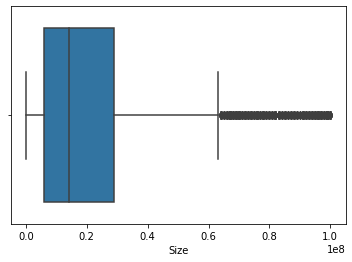

In [33]:
sns.boxplot(x='Size', data=df)

In [34]:
df.query('Size >= 1e8')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1080,Post Bank,FINANCE,4.5,60449,100000000.0,"1,000,000+",Free,0,Everyone,Finance,"July 23, 2018",2.9.12,4.0 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000000.0,"10,000,000+",Free,0,Everyone,Lifestyle;Pretend Play,"July 16, 2018",9.0,4.0 and up
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000000.0,"100,000,000+",Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000000.0,"5,000,000+",Free,0,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up
1988,Hungry Shark Evolution,GAME,4.5,6074627,100000000.0,"100,000,000+",Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
2299,Navi Radiography Pro,MEDICAL,4.7,11,100000000.0,500+,Paid,$15.99,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3 and up
3973,Hungry Shark Evolution,GAME,4.5,6071542,100000000.0,"100,000,000+",Free,0,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100000000.0,"5,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",2.0.0.11,5.0 and up
5427,Ultimate Tennis,SPORTS,4.3,183004,100000000.0,"10,000,000+",Free,0,Everyone,Sports,"July 19, 2018",2.29.3118,4.0.3 and up
5530,The Walking Dead: Our World,GAME,4.0,22435,100000000.0,"1,000,000+",Free,0,Teen,Action,"August 1, 2018",1.1.0.3,5.0 and up


Por mais que a grande maioria dos apps (75%) são pequenos, outros não são necessariamente outliers para se remover.

É comum existir apps maiores, principalmente jogos. Portanto, não será removido nenhum outlier desse atributo

##2.5 Installs

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [36]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


A coluna "**Installs**" possui valores com os sufixos '+' para indicar que o número de instalações é maior do que o valor passado.

Será assumido que o número de instalações é fixo, as virgulas também serão removidas.

In [37]:
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)

Convertendo o tipo para **Númerico**

In [38]:
df['Installs'] =pd.to_numeric(df['Installs'], errors='coerce')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [39]:
df['Installs'].isnull().sum() #Não há nenhum registro com Installs NaN

0

**Remoção de Outliers**

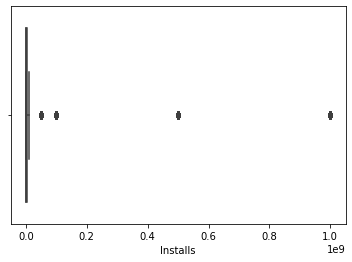

In [40]:
sns.boxplot(x='Installs', data=df)

In [41]:
#mostrando os 10 apps mais baixados
df.sort_values(by='Installs', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643,13000000.0,1000000000,Free,0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
3996,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642112,6100000.0,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
451,Gmail,COMMUNICATION,4.3,4604483,6100000.0,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,19000000.0,1000000000,Free,0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,13000000.0,1000000000,Free,0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
1654,Subway Surfers,GAME,4.5,27722264,76000000.0,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,10500000.0,1000000000,Free,0,Everyone,Photography,"August 1, 2018",Varies with device,Varies with device
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,6100000.0,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3523,Google Drive,PRODUCTIVITY,4.4,2731211,7000000.0,1000000000,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,19000000.0,1000000000,Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device


O boxplot informa 'outliers' claros, sendo esses apps mais bem baixados muito usados. Os 'outliers' serão mantidos no dataset, porque representam a realidade. Durante a análise exploratória ele serão removidos para uma análise mais refinada dos casos gerais.

Há também casos de registros duplicados (Ex., Google News) que serão removidos.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


##2.6 Type

Chegando se há 'outliers' no atributo 'Type'

In [44]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [46]:
#Checando se há registros NaN
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [48]:
df['Type'].isnull().sum() #Não há registros NaN

0

##2.7 Price

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [51]:
#Checando se todos os valores de preço são strings
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

Os valores são armazenados com cifrão (dólares). Será removido o cifrão e convertido de string para um tipo númerico

In [52]:
df['Price'] = df['Price'].str.replace('$', '', regex=False)

In [53]:
#Convertendo de string para numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [54]:
df['Price'].isnull().sum() #Não há nenhum registro NaN para Price

0

In [55]:
#Checando de se há apps 'Free' com preços diferentes de zero
df.query('Type == "Free" and Price != 0')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


**Remoção de Outliers**

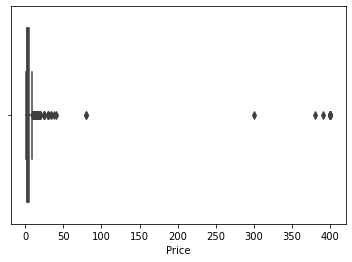

In [56]:
sns.boxplot(x='Price', data=df.query('Type == "Paid"'))

In [57]:
#Checando o porque de apps tão caros
df.query('Type == "Paid"').sort_values(by='Price', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700000.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129,2700000.0,1000,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
4197,most expensive app (H),FAMILY,4.3,6,1500000.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2700000.0,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36,41000000.0,1000,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965000.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5358,I am Rich!,FINANCE,3.8,93,22000000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800000.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up


Os outliers do preço são casos reais de aplicativos vendidos absurdamente caros, não se trata de dados obtidos erroneamente no dataset. Eles serão mantidos, porém durante a análise exploratória será feita uma análise sem eles.

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


##2.8 Content Rating

In [59]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Não há registros com valores NaN e também não há ruidos. Não será realizado nenhum tipo de alteração

##2.9 Genres

In [62]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

Não há valores NaN para esse atributo. Porém há categorias que representam múltiplas categorias. Ex., um app do gênero *Art & Design;Pretend Play* na verdade possui dois gêneros: *Art & Design* e *Pretend Play*

Esses dados serão corrigidos na etapa de análise exploratória quando será feita a análise desse atributo.

##2.10 Last Updated

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9362 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [65]:
#Convertendo para datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

##2.11 Current Ver

**Lidando com valores NaN**

In [67]:
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700000.0,5000,Free,0.00,Everyone,Art & Design,2018-06-06,NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11000.0,1000000,Free,0.00,Everyone,Libraries & Demo,2013-02-12,NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700000.0,500000,Free,0.00,Everyone,Tools,2017-05-10,NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000000.0,50000,Paid,0.99,Everyone,Puzzle,2018-04-18,NaN,4.0 and up


Para que esses registros não sejam removidos devido a ausência do valor da versão do app, será atribuido a esses valores faltantes o valor de *1.0.0*, que é uma aproximação razoável.

In [69]:
df.fillna(value={'Current Ver': '1.0.0'}, inplace=True)

In [70]:
df['Current Ver'].isnull().sum() #Não há registros NaN

0

In [71]:
df.iloc[15]

App               Learn To Draw Kawaii Characters
Category                           ART_AND_DESIGN
Rating                                        3.2
Reviews                                        55
Size                                      2.7e+06
Installs                                     5000
Type                                         Free
Price                                           0
Content Rating                           Everyone
Genres                               Art & Design
Last Updated                  2018-06-06 00:00:00
Current Ver                                 1.0.0
Android Ver                            4.2 and up
Name: 15, dtype: object

**Inspecionando os valores do atributo**

In [72]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

As versões aparentam seguir um padrão: números seguidos de um ponto. Será checado se há registros que não seguem esse padrão, usando expressões regulares

In [75]:
#padrão válido para as versões dos apps
is_pattern = df['Current Ver'].str.match(r'^[0-9]+(\.[0-9]+)*$')

is_not_pattern = ~is_pattern

In [76]:
df[is_not_pattern]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,9200000.0,5000000,Free,0.0,Everyone,Art & Design,2018-07-14,Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,9200000.0,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,16000000.0,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device
62,"ezETC (ETC balance inquiry, meter trial, real-...",AUTO_AND_VEHICLES,4.3,38846,8600000.0,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-28,2.20 Build 02,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,10000000.0,1000,Free,0.0,Everyone,Maps & Navigation,2017-09-27,Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,9900000.0,100000,Free,0.0,Mature 17+,Social,2018-05-23,Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,9900000.0,5000000,Free,0.0,Mature 17+,Social,2018-03-23,Varies with device,Varies with device
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,7150000.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [77]:
df.loc[is_not_pattern, 'Current Ver'].unique()

array(['Varies with device', '2.20 Build 02', '18.05.31+530',
       '3.0.1.11 (Build 311)', '3.4.3_world', 'R6.0.3',
       '1.60.0.31354-release', '37.1.206017801.DR37_RC14', '7.3(800241)',
       '8.1.2-6310', '5.1.2-6310', '4.4B', '1.308.us', '3.8.75a',
       '4.9.2 (Oasis)', '1.5-beta', '3.6.0.115_FN', '1.5-play',
       '1.1.1-play', 'v1.8b22p13', '2.3.34 Prod', 'Cannonau 3.11.11',
       '8.0bld14', '4.1.1-0-prod', '3.04 - Beta', '3.2.0d',
       '2.76.2.0-android', 'p5.7.1', '7.3.4-play', '3.3.0(1)',
       'Public.Heal', '1.31.0-15160.950adac99', '8.2.0_8', 'v3.1.1',
       '5.2.4(881)', '1.0.0.21_180410', '2.4.12-r244', 'Version:6.97',
       '5.2.2018010801-1', '3.8.5.Go', '2.0081_206', '1_39_93',
       '1.2.3-play', '3.2.0h', '1.10.0.user.pro.release',
       '4.1.5 (Steglitz)', '1.7.1 (946)', '3.1-2018 – (13)',
       '1.830.0.564-(e405bb2)', 'PN.1.0', '10.4.1.015_05',
       '10.4.1.000_00', '2.5.0 b665', '1.4.15-free', 'T4.6.5-tl2.0.1',
       '50.2 lite', '6.25.0+1906

Existem diversos valores que não seguem o padrão. Será alterado somente o valor 'Varies with divice' para '1.0.0'.

In [80]:
df['Current Ver'] = df['Current Ver'].replace('Varies with device', '1.0.0')

In [81]:
df[is_not_pattern].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0.0,4.2 and up
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,9200000.0,5000000,Free,0.0,Everyone,Art & Design,2018-07-14,1.0.0,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,9200000.0,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,1.0.0,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,16000000.0,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,1.0.0,Varies with device
62,"ezETC (ETC balance inquiry, meter trial, real-...",AUTO_AND_VEHICLES,4.3,38846,8600000.0,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-07-28,2.20 Build 02,4.1 and up


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int64         
 4   Size            9366 non-null   float64       
 5   Installs        9366 non-null   int64         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9364 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


##2.12 Android Ver

**Lidando com valores NaN**

In [83]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000000.0,1000,Paid,1.49,Everyone,Personalization,2018-07-20,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100000.0,10000,Free,0.00,Everyone,Personalization,2018-03-27,1.1,NaN


Esses registros possuem valores NaN para o atributo 'Android Ver'. Eles serão removidos pois se tratam de apenas dois registros

In [84]:
df.dropna(subset=['Android Ver'], inplace=True)

In [86]:
df['Android Ver'].isnull().sum() #Não há valores NaN

0

**Checando valores restantes**

In [87]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

Há diferentes formatações para a versão do Android, incluindo 'Varies with device'. A limpeza e pré-processamento desta coluna será realizada no momento de análise exploratória.